In [1]:
from load_data import *
from feature_creation import *
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from model_predictions import *

In [2]:
consTrain, acctTrain, inflowsTrain, outflowsTrain = load_training_data()
XTrain, yTrain, cat_percent_model, cat_income_model = create_features(consTrain, acctTrain, inflowsTrain, outflowsTrain)

Index(['ACCOUNT_FEES', 'ATM_CASH', 'AUTOMOTIVE', 'BILLS_UTILITIES', 'BNPL',
       'CHILD_DEPENDENTS', 'CREDIT_CARD_PAYMENT', 'EDUCATION', 'ENTERTAINMENT',
       'ESSENTIAL_SERVICES', 'EXTERNAL_TRANSFER', 'FOOD_AND_BEVERAGES',
       'GENERAL_MERCHANDISE', 'GIFTS_DONATIONS', 'GROCERIES',
       'HEALTHCARE_MEDICAL', 'HOME_IMPROVEMENT', 'INSURANCE', 'LOAN',
       'MORTGAGE', 'OVERDRAFT', 'PAYCHECK', 'PETS', 'RENT', 'SELF_TRANSFER',
       'TAX', 'TRAVEL', 'UNCATEGORIZED'],
      dtype='object', name='category_description')


In [3]:
best_thresh = evaluate_features(XTrain,yTrain)

Best Threshold=0.00658737, Best AUC=0.862, Best Accuracy=84.06%


In [4]:
selection_model, selection = train_model(XTrain,yTrain, best_thresh)

Index(['checking_month2_EMA', 'checking_month3_EMA', 'checking_month4_EMA',
       'checking_month5_EMA', 'checking_month6_EMA', 'checking_month7_EMA',
       'checking_month2_SMA', 'checking_month3_SMA', 'checking_month4_SMA',
       'checking_month6_SMA', 'checking_month7_SMA', 'SAVINGS_acct_count',
       'CHECKING_balance_std_diff_regress_coeff',
       'CHECKING_balance_std_regress_coeff', 'DEPOSIT_inflow_over_outflow',
       'EXTERNAL_TRANSFER_inflow_over_outflow',
       'INVESTMENT_INCOME_inflow_over_outflow', 'PAYCHECK_inflow_over_outflow',
       'REFUND_inflow_over_outflow', 'SELF_TRANSFER_inflow_over_outflow',
       'SMALL_DOLLAR_ADVANCE_inflow_over_outflow', 'TAX_inflow_over_outflow',
       'EXTERNAL_TRANSFER_inflow_over_inflow', 'LOAN_inflow_over_inflow',
       'MISCELLANEOUS_inflow_over_inflow', 'REFUND_inflow_over_inflow',
       'SMALL_DOLLAR_ADVANCE_inflow_over_inflow', 'TAX_inflow_over_inflow',
       'DEPOSIT_inflow_over_income', 'EXTERNAL_TRANSFER_inflow_over_i

In [5]:
consTest, acctTest, inflowsTest, outflowsTest = load_holdout_data()

In [6]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from IncomeEstimation.income_processing import process_data
# from IncomeEstimation.income_model import run_model
# from sklearn.model_selection import train_test_split


# import warnings
# warnings.filterwarnings("ignore")

# def cat_percent_income(incomes,inflow, outflows, cons):
        
#     # Total outflow amount by consumer, account type, and category
#     outflows_cat_amount = outflows.groupby(['prism_consumer_id', 'category_description'])['amount'].sum().reset_index()
  


#     #income or inflow
#     inflows_consumer_amount = inflow.groupby(["prism_consumer_id"])['amount'].sum().reset_index()
#     income_final = pd.merge(incomes,inflows_consumer_amount,on=["prism_consumer_id"], suffixes=('_income', '_inflow'))
#     income_final.loc[income_final['amount_income'] == 0, 'amount_income'] = income_final.loc[income_final['amount_income'] == 0, 'amount_inflow']
#     income_final.drop('amount_inflow',axis=1,inplace = True)
    

    
#     # Calculate percentage of spending by category for each consumer
#     percentage_df = pd.merge(income_final, outflows_cat_amount, on=['prism_consumer_id'], suffixes=('_income', '_outflows'), how='left')
#     percentage_df['category_description'].fillna('UNCATEGORIZED', inplace=True)
#     percentage_df['percentage'] = percentage_df['amount'] / percentage_df['amount_income']


#     cat_percentage = percentage_df.pivot(index='prism_consumer_id', columns='category_description', values='percentage').add_suffix('_income_percent')
#     cat_percentage.reset_index(inplace=True)
#     cat_percentage.fillna(0, inplace=True)
    

        
#     X = cat_percentage.set_index('prism_consumer_id')
#     y = (cons.sort_values(by='prism_consumer_id').reset_index(drop=True))['FPF_TARGET']
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=7, stratify=y)
    
#     print(X.columns)

    
#     model = LogisticRegression().fit(X_train, y_train)
#     predictions = model.predict(X)
    
#     predictions_df = pd.DataFrame(predictions, index=X.index, columns=['Predictions'])
#     predictions_df.reset_index(inplace=True)

#     return predictions_df, model

# def cat_percent_income_testing(incomes, inflow, outflows, model):

#     outflows_cat_amount = outflows.groupby(['prism_consumer_id', 'category_description'])['amount'].sum().reset_index()

#     #income or inflow
#     inflows_consumer_amount = inflow.groupby(["prism_consumer_id"])['amount'].sum().reset_index()
#     income_final = pd.merge(incomes,inflows_consumer_amount,on=["prism_consumer_id"], suffixes=('_income', '_inflow'))
#     income_final.loc[income_final['amount_income'] == 0, 'amount_income'] = income_final.loc[income_final['amount_income'] == 0, 'amount_inflow']
#     income_final.drop('amount_inflow',axis=1,inplace = True)
    
 
#     # Calculate percentage of spending by category for each consumer
#     percentage_df = pd.merge(income_final, outflows_cat_amount, on=['prism_consumer_id'], suffixes=('_income', '_outflows'), how='left')
#     percentage_df['category_description'].fillna('UNCATEGORIZED', inplace=True)
#     percentage_df['percentage'] = percentage_df['amount'] / percentage_df['amount_income']


#     cat_percentage = percentage_df.pivot(index='prism_consumer_id', columns='category_description', values='percentage').add_suffix('_income_percent')
#     cat_percentage.reset_index(inplace=True)
#     cat_percentage.fillna(0, inplace=True)
        
#     X = cat_percentage.set_index('prism_consumer_id')

#     print(X.columns)
#     predictions = model.predict(X)
    
#     predictions_df = pd.DataFrame(predictions, index=X.index, columns=['Predictions'])
#     predictions_df.reset_index(inplace=True)

#     return predictions_df

# def income_estimate(inflow, outflow, cons, trainBool = True, model = None):
#     #inflow_clean, determined_transactions, undetermined_transactions = process_data(inflow)
#     #complete_income = run_model(inflow_clean, determined_transactions, undetermined_transactions)

#     if trainBool:
#         complete_income = pd.read_csv('IncomeEstimation/income_estimates.csv')
#         predictions, model = cat_percent_income(complete_income, inflow, outflow, cons)
#         return complete_income, predictions, model
#     else:
#         complete_income = pd.read_csv('IncomeEstimation/income_holdout_estimates.csv')
#         predictions = cat_percent_income_testing(complete_income, inflow, outflow, model)
    
#         return  complete_income, predictions

In [7]:
# def create_features(cons, acct, inflows, outflows, trainBool = True, cat_income_model = None, cat_percent_model = None):

#     if trainBool:
#         income, cat_income_predictions, cat_income_model  = income_estimate(inflows, outflows, cons)

#     else:
#         income, cat_income_predictions  = income_estimate(inflows, outflows, cons, trainBool, cat_income_model)

#     cat_income_predictions = rename_columns(cat_income_predictions, '_cat_income_percentage')

    
#     # Calculate percentage of spending by category for each consumer

#     if trainBool:
#         cat_percent_predictions, cat_percent_model = cat_percent(inflows, outflows, cons)
#     else:
#         cat_percent_predictions = cat_percent_testing(inflows, outflows, cat_percent_model)

#     cat_percent_predictions = rename_columns(cat_percent_predictions, '_cat_percentage')

#     # Count of accounts by type for each consumer
#     acct_count_flat = account_count(inflows)
#     acct_count_flat = rename_columns(acct_count_flat, '_acct_count')
    

#     # Standardize and calculate cumulative sum of inflows and outflows
#     coefficients_std_flat = balance_diff_std(inflows, outflows)
#     coefficients_std_flat = rename_columns(coefficients_std_flat, '_balance_std_diff_regress_coeff')

#     inf_features = inflow_features(inflows, outflows, income)
    
#     #new balance funcs
#     balance_std_df, balance_std_coeff = balance_cumsum_std(inflows,outflows,acct)
#     balance_std_coeff = rename_columns(balance_std_coeff, '_balance_std_regress_coeff')

#     mvg_avgs = moving_avg(balance_std_df)

#     # Merge all features
#     cnt_and_perc = pd.merge(acct_count_flat, cat_percent_predictions, on='prism_consumer_id', how='outer')
#     cnt_and_perc = cnt_and_perc.fillna(0)
#     cnt_perc_coeff = pd.merge(cnt_and_perc, coefficients_std_flat, on='prism_consumer_id', how='outer')
    
#     cnt_both_perc_coeff = pd.merge(cnt_perc_coeff, cat_income_predictions, on = 'prism_consumer_id', how = 'outer')

#     cnt_percs_coeff_balance = pd.merge(cnt_both_perc_coeff, balance_std_coeff, on = 'prism_consumer_id', how = 'outer')

#     with_mvg_avgs = pd.merge(mvg_avgs, cnt_percs_coeff_balance, on = 'prism_consumer_id', how = 'outer')
#     all_features = pd.merge(with_mvg_avgs, inf_features, on = 'prism_consumer_id', how = 'outer')

#     if trainBool:
#         # Get target variable and drop unnecessary columns
#         final_df = pd.merge(all_features, cons, on='prism_consumer_id')
#         final_df.drop(columns=['APPROVED','evaluation_date'], inplace=True)
#         final_df['FPF_TARGET'] = final_df['FPF_TARGET'].astype(int)
#         final_df = final_df.set_index('prism_consumer_id')

#         X = final_df.drop(columns=['FPF_TARGET'])
#         y = final_df['FPF_TARGET']

#         return X,y, cat_percent_model, cat_income_model
    
#     else:
        
#         return all_features

In [6]:
XTest = create_features(consTest, acctTest, inflowsTest, outflowsTest, False, cat_percent_model, cat_income_model)

Index(['ACCOUNT_FEES', 'ATM_CASH', 'AUTOMOTIVE', 'BILLS_UTILITIES', 'BNPL',
       'CHILD_DEPENDENTS', 'CREDIT_CARD_PAYMENT', 'EDUCATION', 'ENTERTAINMENT',
       'ESSENTIAL_SERVICES', 'EXTERNAL_TRANSFER', 'FOOD_AND_BEVERAGES',
       'GENERAL_MERCHANDISE', 'GIFTS_DONATIONS', 'GROCERIES',
       'HEALTHCARE_MEDICAL', 'HOME_IMPROVEMENT', 'INSURANCE', 'LOAN',
       'MORTGAGE', 'OVERDRAFT', 'PAYCHECK', 'PETS', 'RENT', 'SELF_TRANSFER',
       'TAX', 'TRAVEL', 'UNCATEGORIZED'],
      dtype='object', name='category_description')


In [10]:

# predictions = selection_model.predict(X_subset)
# predictions.to_csv('holdout_predictions.csv')
# reasons = shap_importance(X_subset, selection, selection_model)

In [9]:
predictions, reasons = run_model(selection_model , selection, XTest)

ValueError: X has a different shape than during fitting.

In [3]:
best_thresh = evaluate_features(X,y)

Best Threshold=0.00533085, Best AUC=0.860, Best Accuracy=84.01%


In [6]:
reason, model = run_model(X, y, best_thresh)

 n=63, Accuracy: 82.91% , AUC: 0.666
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       798
           1       0.56      0.41      0.47       185

    accuracy                           0.83       983
   macro avg       0.72      0.67      0.68       983
weighted avg       0.81      0.83      0.82       983



In [7]:
reason

[[('checking_month4_EMA', 0.466295),
  ('EXTERNAL_TRANSFER_inflow_over_outflow', 0.35523158),
  ('PAYCHECK_PLACEHOLDER_inflow_over_income', 0.19375958)],
 [('CREDIT_CARD_PAYMENT_outflow_over_income', 0.7844082),
  ('ATM_CASH_cat_percentage', 0.4488825),
  ('ESSENTIAL_SERVICES_outflow_over_income', 0.44590145)],
 [('CREDIT_CARD_PAYMENT_outflow_over_income', 0.5794924),
  ('checking_month7_EMA', 0.3883725),
  ('PAYCHECK_PLACEHOLDER_inflow_over_income', 0.32353136)],
 [('SMALL_DOLLAR_ADVANCE_inflow_over_outflow', 0.530547),
  ('SMALL_DOLLAR_ADVANCE_inflow_over_inflow', 0.15567137),
  ('ACCOUNT_FEES_outflow_over_income', 0.10724597)],
 [('CREDIT_CARD_PAYMENT_outflow_over_income', 0.49610308),
  ('EXTERNAL_TRANSFER_inflow_over_income', 0.2962228),
  ('SMALL_DOLLAR_ADVANCE_inflow_over_outflow', 0.25713155)],
 [('CREDIT_CARD_PAYMENT_outflow_over_income', 0.69683844),
  ('ACCOUNT_FEES_outflow_over_income', 0.5448024),
  ('DEPOSIT_inflow_over_outflow', 0.41800913)],
 [('CREDIT_CARD_PAYMENT_outf

In [8]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
# # get columns
# feature_names = model.get_booster().feature_names
# with open('feature_names.txt', 'w') as file:
#     for feature in feature_names:
#         file.write(feature + '\n')

In [12]:
from collections import Counter
features = [j[0] for r in reason for j in r]
feature_counts = Counter(features)

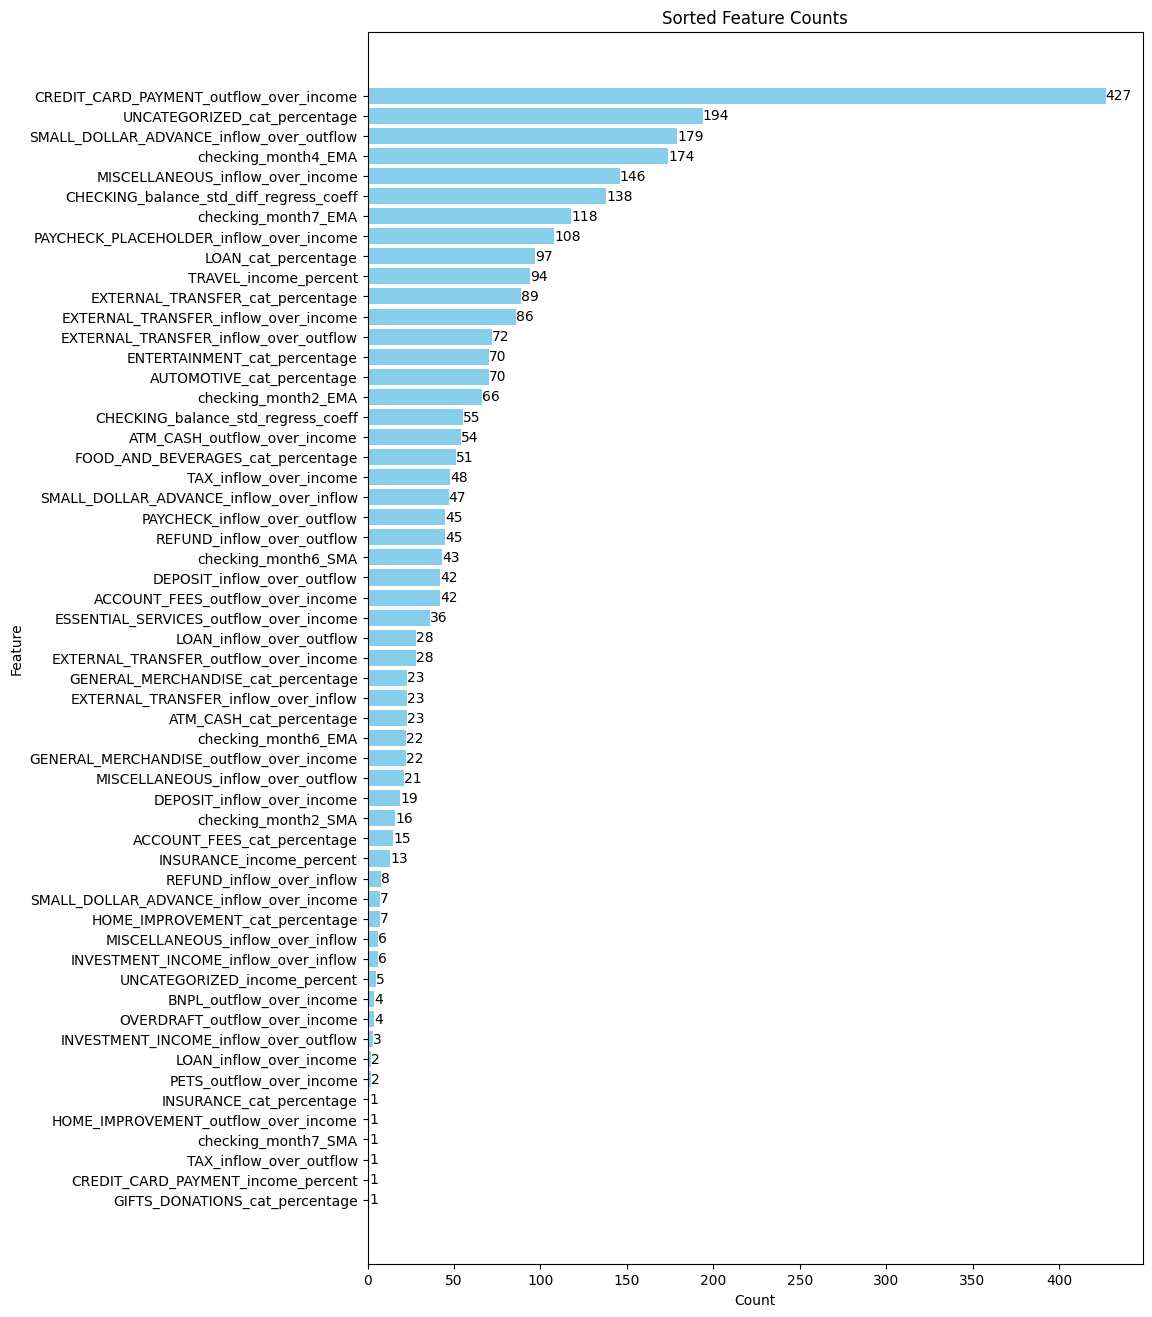

In [22]:
# Sort features by their counts
sorted_features = sorted(feature_counts.items(), key=lambda x: x[1])
sorted_feature_names = [feature[0] for feature in sorted_features]
sorted_feature_counts = [feature[1] for feature in sorted_features]

# Plot the sorted value counts
plt.figure(figsize=(10, 16))
plt.barh(sorted_feature_names, sorted_feature_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Feature')
plt.title('Sorted Feature Counts')

for i, count in enumerate(sorted_feature_counts):
    plt.text(count, i, str(count), ha='left', va='center', color='black')

plt.savefig('most_common_reasons.png', bbox_inches='tight')
plt.show()